Reading the Dataset
Read the two previously read and preprocessed datasets into Pandas Data frames.
Read the two previously read and preprocessed datasets into Pandas Data frames.
Load the previously pre-processed dataset saved in the csv file “data_refined.csv” into a Pandas Data Frame.
And
Also load the following:
https://www.kaggle.com/mirichoi0218/insurance/download

In [6]:
import pandas as pd
import numpy as np
import sklearn as sk

In [7]:
insurance = pd.read_csv('~/Desktop/insurance.csv')

In [8]:
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


Preprocessing
Perform any needed pre-processing on the chosen features including:
Scaling;
Encoding;
Dealing with Nan values; and
Normalization.

In [9]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
y = insurance.charges.values
selected_X=insurance.drop(['charges'], axis = 1).values
encoded_X =OrdinalEncoder().fit_transform(selected_X)
encoded_X = StandardScaler().fit_transform(encoded_X)

Clustering
Use k-means and Mean-shift to fit your data.
Get optimal k for k-means using the elbow curve method.
Try different bandwidth for the mean-shift clustering.

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

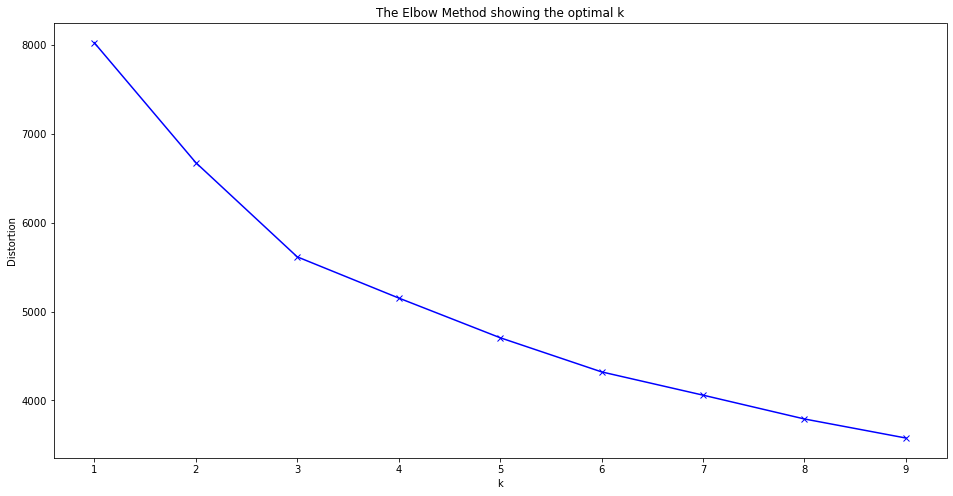

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline 
#We can easily run K-Means for a range of clusters using a for loop and 
#collecting the distortions into a list.
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(encoded_X)
    distortions.append(kmeanModel.inertia_)
#Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-') #bx- means blue x marker and solid line
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [11]:
#We can observe that the “elbow” is the number 3 which is optimal for this case. 
#Now we can run a K-Means using as n_clusters the number 3.
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(encoded_X)
clusters = kmeanModel.predict(encoded_X)
print(kmeanModel.inertia_)

5617.133137855171


In [12]:
#Try different bandwidth for the mean-shift clustering.
from sklearn.cluster import MeanShift
bandwidth = 2
mean_shift = MeanShift(bandwidth = bandwidth)
mean_shift.fit(encoded_X)
clusters = mean_shift.predict(encoded_X)
print(mean_shift.cluster_centers_)

[[ 0.07540208 -1.0105187  -0.12236038 -0.19845659 -0.5074631  -0.00550461]
 [-0.12141906  0.98959079  0.11932502 -0.18788195 -0.5074631   0.00615342]
 [ 0.10418068  0.98959079  0.37695439  0.02717066  1.97058663  0.32291029]
 [-0.0311715  -1.0105187  -0.25681939 -0.50007386  1.97058663 -0.06296332]
 [-0.01474046 -1.0105187  -1.84095024  3.24061871  1.97058663  1.34390459]]
